## Task 1
Import functions we will use later


In [2068]:
import pandas as pd
from datetime import datetime
import matplotlib
import matplotlib.pylab as plt
import matplotlib.dates as mdates
%matplotlib inline 

#### Read data
Read the csv file and store it into a data frame.
Deal with date data and make it index

In [2069]:
dp = lambda x: datetime.strptime(x, "%Y-%m-%d")
# read the data
df = pd.read_csv('bank-tabular.csv', delimiter='\t', index_col="date", parse_dates=True, date_parser = dp)
df.head()

,customer_id,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
date,,,,,,,,,,,,,,,,,
2022-08-22,216604,Male,50.0,Munster,Personal,True,False,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,True
2022-11-23,259276,Female,61.0,Leinster,Personal,True,False,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0,True
2022-01-21,265459,Female,63.0,Munster,Business,True,False,2.0,2.0,5.0,5.0,2.0,NaN,4.0,4.0,NaN,True
2022-03-13,58770,f,NaN,Leinster,Business,True,False,NaN,4.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,True
2022-08-08,318031,Female,41.0,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,2.0,False


check if there is duplicated customer id

In [2070]:
# Check for duplicate ids
is_duplicate = df["customer_id"].duplicated()
duplicates = df[is_duplicate]
len(duplicates)

0

Check how many empty data in each column

In [2071]:
df.isna().sum()

customer_id                0
customer_gender          312
customer_age             470
customer_location        365
customer_type              0
has_cc                     0
has_mortgage               0
convenience               64
customer_service          29
online_banking            30
interest_rates           165
fees_charges              76
community_involvement    300
products_services        100
privacy_security         262
reputation               402
satisfied                  0
dtype: int64

In [2072]:
# for i in range(len(df.columns)):
#     print(df.columns[i] , ": ", len(df[df[df.columns[i]].isna()]))

check if all the data are represented in same form

In [2073]:
for i in range(len(df.columns)):
    print(df.columns[i] , ": ", df[df.columns[i]].value_counts())
    print(" ")

customer_id :  216604    1
140631    1
171597    1
268903    1
72526     1
         ..
39311     1
194880    1
223692    1
208442    1
109281    1
Name: customer_id, Length: 3000, dtype: int64
 
customer_gender :  Female           1124
Male             1057
Not specified     221
f                 134
m                 118
Unspecified        34
Name: customer_gender, dtype: int64
 
customer_age :  48.0    90
32.0    79
46.0    69
31.0    66
51.0    64
        ..
86.0     2
92.0     1
88.0     1
91.0     1
84.0     1
Name: customer_age, Length: 71, dtype: int64
 
customer_location :  Leinster    1248
Munster      777
Connacht     379
Ulster       231
Name: customer_location, dtype: int64
 
customer_type :  Business         1461
Personal         1371
Business-Plus     168
Name: customer_type, dtype: int64
 
has_cc :  True     2512
False     488
Name: has_cc, dtype: int64
 
has_mortgage :  False    2052
True      948
Name: has_mortgage, dtype: int64
 
convenience :  2.0    779
3.0    726
4

The customer gender should only be 3 categories, but there are 6 now.

In [2074]:
df["customer_gender"].value_counts()

Female           1124
Male             1057
Not specified     221
f                 134
m                 118
Unspecified        34
Name: customer_gender, dtype: int64

Combine those data that represents same thing.

In [2075]:
# Replace "f" with "Female", "m" with "Male" and "Not specified" with "Unspecified"
df["customer_gender"] = df["customer_gender"].replace({"f": "Female", "m": "Male", "Not specified": "Unspecified"})

# View the new value counts
df["customer_gender"].value_counts()

Female         1258
Male           1175
Unspecified     255
Name: customer_gender, dtype: int64

#### Clean the data
Drop the n/a if its not in numeric form

In [2076]:
df.dropna(subset=["customer_gender"], inplace=True)
df.dropna(subset=["customer_location"], inplace=True)

now we got 2365 rows of data

In [2077]:
len(df)

2365

Fill mean into n/a if it's numeric

In [2078]:
df = df.fillna(df.mean())

/var/folders/bv/hmn3r21123j05qlf8vh9bpmh0000gn/T/ipykernel_30415/114435927.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


Now, there are no longer na in this dataframe.

In [2079]:
df.isna().sum()

customer_id              0
customer_gender          0
customer_age             0
customer_location        0
customer_type            0
has_cc                   0
has_mortgage             0
convenience              0
customer_service         0
online_banking           0
interest_rates           0
fees_charges             0
community_involvement    0
products_services        0
privacy_security         0
reputation               0
satisfied                0
dtype: int64

transform the date to correct form and make the data frame sort by date

In [2080]:
df = df.sort_values(by='date')
df

,customer_id,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
date,,,,,,,,,,,,,,,,,
2021-01-05,334485,Male,46.000000,Munster,Personal,True,True,3.0,2.768771,3.0,2.0,1.000000,2.0,3.0,3.000000,3.104492,False
2021-01-05,208587,Male,30.000000,Leinster,Business,True,True,2.0,2.000000,4.0,3.0,3.138395,5.0,4.0,5.000000,4.000000,False
2021-01-05,11724,Female,47.495486,Munster,Business-Plus,True,True,3.0,1.000000,3.0,3.0,5.000000,1.0,5.0,5.000000,4.000000,False
2021-01-05,163058,Female,33.000000,Leinster,Business,True,False,2.0,2.000000,1.0,3.0,1.000000,5.0,5.0,3.396296,2.000000,False
2021-01-06,305619,Male,47.495486,Leinster,Business,True,False,5.0,4.000000,2.0,1.0,2.000000,4.0,3.0,4.000000,4.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22,159839,Male,56.000000,Leinster,Business,True,False,4.0,4.000000,4.0,4.0,5.000000,5.0,5.0,5.000000,4.000000,True
2022-12-22,139994,Unspecified,30.000000,Leinster,Personal,True,False,1.0,1.000000,1.0,2.0,4.000000,5.0,4.0,3.396296,3.104492,False
2022-12-22,310725,Female,21.000000,Leinster,Personal,True,True,3.0,3.000000,3.0,1.0,3.000000,1.0,3.0,3.396296,3.000000,False


## Task 2

To see all the columns in this dataframe.

In [2081]:
df.columns

Index(['customer_id', 'customer_gender', 'customer_age', 'customer_location',
       'customer_type', 'has_cc', 'has_mortgage', 'convenience',
       'customer_service', 'online_banking', 'interest_rates', 'fees_charges',
       'community_involvement', 'products_services', 'privacy_security',
       'reputation', 'satisfied'],
      dtype='object')

See the distribution between customer's location and gender.

In [2082]:
gen_loc = pd.crosstab(df["customer_location"], df["customer_gender"])
gen_loc

customer_gender,Female,Male,Unspecified
customer_location,,,
Connacht,162,142,44
Leinster,520,491,104
Munster,331,303,63
Ulster,95,90,20


Plot it as a bar graph.

TypeError: 'str' object is not callable

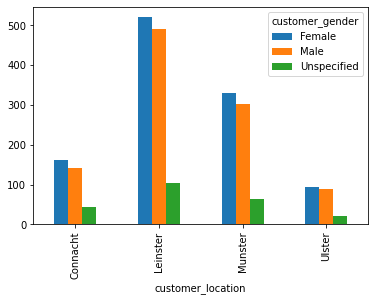

In [2083]:
import matplotlib.pyplot as plt

gen_loc.plot.bar()

plt.title('Gender distribution by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=0)  # rotate x-axis labels to be horizontal
plt.show()


From this, we could tell that female customers are slightly higher than male in every location.

We can also stack it to see which location has the most customers. In this case, it's Leinster.

In [ ]:
gen_loc.plot.bar(stacked=True)
plt.title('Gender distribution by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=0)  # rotate x-axis labels to be horizontal
plt.show()

Now, let's see the distribution between customer location and has credit card.

In [ ]:
loc_cc = pd.crosstab(df["customer_location"], df["has_cc"])
loc_cc

In [ ]:
loc_cc.plot.bar(stacked=True) #, figsize=(10, 6)
plt.title("Credit Card Ownership by Customer Location")
plt.xlabel("Customer Location")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Credit Card", labels=loc_cc.columns)
plt.show()

With this, we could tell that most people has credit cards and the total number of people, but not the percentage and the sum of people who have credit cards.

So, let's take another insight like this.

In [ ]:
cc_loc = pd.crosstab(df["has_cc"], df["customer_location"])
cc_loc

Now, we could see that around 2000 people have creadit cards.

In [ ]:
cc_loc.plot.bar(stacked=True) #, figsize=(10, 6)
plt.title("Credit Card Ownership by Customer Location")
plt.xlabel("Customer Location")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Credit Card", labels=cc_loc.columns)
plt.show()

And the percentage of people that have credit card in each location 

In [ ]:
# cross_tab = pd.crosstab(df["has_cc"], df["customer_location"]).apply(lambda r: r/r.sum(), axis=1)

fig, axs = plt.subplots(1, 4, figsize=(15,5))

for i, ctype in enumerate(cc_loc.columns):
    ax = axs[i]
    ax.pie(cc_loc[ctype], autopct='%1.1f%%', startangle=90)
    ax.set_title(ctype)
    
# cc_loc.plot(kind="pie", subplots=True, figsize=(10, 6), autopct="%1.1f%%")
plt.suptitle("Credit Card Ownership by Customer Location")
fig.legend(title="Credit Card", labels=cc_loc.index, loc="upper right")
plt.show()


Next, we're going to see the distribution between the customer location and its type.

In [ ]:
ct = pd.crosstab(df["customer_location"], df["customer_type"])

ct.plot.bar()
plt.title('Customer Location by Type', fontsize=16)
plt.xlabel('Customer Location', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Customer Type')
plt.show()

With this, we could tell that most people are Business type customer, and the Business-Plus customers are relatively rare.

In [ ]:
type_loc = pd.crosstab(df["customer_type"], df["customer_location"])
type_loc

With pie, we could have a closer insight of the distribution. 

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(15,5))

for i, ctype in enumerate(type_loc.columns):
    ax = axs[i]
    ax.pie(type_loc[ctype], autopct='%1.1f%%', startangle=90)
    ax.set_title(ctype)
    
plt.suptitle("Cutomer Type by Customer Location")
fig.legend(title="Cutomer Type", labels=type_loc.index, loc="upper right")
plt.show()

Next, we're going to analyze the relationship between age and other variables.
First, we have to make the age show in group, here we make each group has a range of 10 years.

In [ ]:
import numpy as np

# Define the age groups
bins = [0, 9, 19, 29, 39, 49, 59, np.inf]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60+']

# Create a new column with the age group for each customer
df['age_group'] = pd.cut(df['customer_age'], bins=bins, labels=labels)

# Analyze the data using the age_group column
age_ = df.drop(["customer_age", "customer_id"], axis=1).groupby('age_group').mean().round(2)

age_ 

Now, let's see the distribution of age and customer location.

In [ ]:
age_loc = pd.crosstab(df['age_group'], df['customer_location'])
age_loc

With bar graph, we have a sneak peak of the distribution. We could tell that Leinster has the most customer and that's it.

In [ ]:
age_loc.plot.bar()

plt.title('Location distribution by age group')
plt.xlabel('Age')
plt.ylabel('Location')
plt.legend(title='Location')
plt.show()

Then, if we stack it, we could see that the group of 40-49 years old is the majority of this bank, following by the group of 50-59, 60+ and 30-39.

In [ ]:
age_loc.plot.bar(stacked = True)

plt.title('Location distribution by age group')
plt.xlabel('Age')
plt.ylabel('Location')
plt.legend(title='Location')
plt.show()

If we analyze it with pie graph, then we will learn that actually the age group distribution in each group is pretty much the same which is quite interesting.

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(15,5))

for i, ctype in enumerate(age_loc.columns):
    ax = axs[i]
    ax.pie(age_loc[ctype], autopct='%1.1f%%', startangle=90)
    ax.set_title(ctype)
    
fig.legend(title='Age', loc='upper right', labels=age_loc.index)
plt.suptitle('Age group distribution by customer location', fontsize=16)
plt.show()

This is just to show that pie graph is more suitable for displaying percentage.

In [ ]:
loc_age = pd.crosstab(df['customer_location'], df['age_group'])
loc_age.plot.bar()

plt.title('Age group distribution by Location ')
plt.xlabel('Location')
plt.ylabel('Age')
plt.legend(title='Age')
plt.show()

Next, we're going to talk about the distribution of age group and customer type.

In [ ]:
age_type = pd.crosstab(df['age_group'], df['customer_type'])
age_type

With bar graph, we could tell that Business type customer might be the majority, but this is not what we want from this cross table.

In [ ]:
age_type.plot.bar()

plt.title('Customer type distribution by age group')
plt.xlabel('Age')
plt.ylabel('Customer type')
plt.legend(title='Customer type')
plt.show()

We've all known that pie graph could give a clearer look for this. But each age group has different number of people. So these pie graphs aren't really helpful.

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))


for i, ctype in enumerate(age_type.columns):
    ax = axs[i]
    ax.pie(age_type[ctype], labels=None, autopct='%1.1f%%', startangle=90)
    ax.set_title(ctype)
    
fig.legend(title='Age', loc='upper right', labels = age_type.index)
plt.suptitle('Age group distribution by customer type', fontsize=16)
plt.show()


The point is to see the majority of customer type in each age group. so we change the cross table a bit.

In [ ]:
type_age = pd.crosstab(df['customer_type'], df['age_group'])
type_age

Bar graph could  give us an insight of it, but it's not intuitive enough.

In [ ]:
type_age.plot.bar()

plt.title('Age group distribution by customer type')
plt.xlabel('Customer type')
# plt.ylabel('')
plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

To have a more obvious view, pie graph is the first go-to.

In [ ]:
type_age = pd.crosstab(df['customer_type'], df['age_group'], normalize='index') * 100

fig, axs = plt.subplots(1, 6, figsize=(15, 5))

for i, ctype in enumerate(type_age.columns):
    ax = axs[i]
    ax.pie(type_age[ctype], labels=None, autopct='%1.1f%%', startangle=90)
    ax.set_title(ctype)

fig.legend(title='Age', loc='upper right',  labels=type_age.index)
fig.suptitle('Customer type distribution by age group', fontsize=16)
plt.show()

So now, we could tell that business-plus customer is surprisingly high in the age group of 10-19 years compared to other groups.

Next, we take a look in the popularity of credit cards in each age group.

In [ ]:
age_cc = pd.crosstab(df['age_group'], df['has_cc'])
age_cc

With this, we could see that the number of population that has credit card, but it doesn't really help analyzing anything.

In [ ]:
age_cc.plot.bar()

plt.title('Credit card distribution by age group')
plt.xlabel('Age')
plt.legend(labels=age_cc.columns)
plt.xticks(rotation=0)
plt.show()

So, we could show the data in percentage.

In [ ]:
age_cc_index = pd.crosstab(df['age_group'], df['has_cc'], normalize='index') * 100
age_cc_index.round(2)

In [ ]:
age_cc_index.plot.bar()

plt.title('Credit card distribution by age group')
plt.xlabel('Age')
plt.legend(labels=age_cc_index.columns)
plt.xticks(rotation=0)
plt.show()

Maybe the line graph could give us an insight that younger age group has a tendancy to have credit cards.

In [ ]:
age_cc_index.plot.line()

plt.title('Credit card distribution by age group')
plt.xlabel('Age')
plt.legend(labels=age_cc_index.columns)
plt.xticks(rotation=0)
plt.show()

Pie graph would be a better choice when it comes to percantage.

In [ ]:
cc_age = pd.crosstab( df['has_cc'], df['age_group'])
cc_age

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(15, 5))

for i, ctype in enumerate(cc_age.columns):
    ax = axs[i]
    ax.pie(cc_age[ctype], labels=None, autopct='%1.1f%%', startangle=90)
    ax.set_title(ctype)

fig.legend(title='Has Credit Card', loc='upper right',  labels=cc_age.index)
fig.suptitle('Has Credit Card by age group', fontsize=16)
plt.show()

Now, let's take a look about age group and mortgage.

In [ ]:
age_mor = pd.crosstab(df['age_group'], df['has_mortgage'])
age_mor

In [ ]:
age_mor.plot.bar()

plt.title('Mortgage distribution by age group')
plt.xlabel('Age')
plt.legend(labels=age_mor.columns)
plt.xticks(rotation=0)
plt.show()

Maybe the line graph could give us an insight that younger age group has a tendancy to have credit cards.

In [ ]:
age_mor.plot.line()

plt.title('Mortgage distribution by age group')
plt.xlabel('Age')
plt.legend(labels=age_mor.columns)
plt.xticks(rotation=0)
plt.show()

Pie graph would be a better choice when it comes to percantage.

In [ ]:
mor_age = pd.crosstab( df['has_mortgage'], df['age_group'])
mor_age

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(15, 5))

for i, ctype in enumerate(mor_age.columns):
    ax = axs[i]
    ax.pie(mor_age[ctype], labels=None, autopct='%1.1f%%', startangle=90)
    ax.set_title(ctype)

fig.legend(title='Has Credit Card', loc='upper right',  labels=mor_age.index)
fig.suptitle('Has Credit Card by age group', fontsize=16)
plt.show()

satisfication

In [ ]:
age_sat = pd.crosstab(df['age_group'], df['satisfied'])
age_sat

In [ ]:
sat_age = pd.crosstab(df['satisfied'], df['age_group'])
sat_age

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(15, 5))

for i, ctype in enumerate(sat_age.columns):
    ax = axs[i]
    ax.pie(sat_age[ctype], labels=None, autopct='%1.1f%%', startangle=90)
    ax.set_title(ctype)

fig.legend(title='has mortgage', loc='upper right',  labels=sat_age.index)
fig.suptitle('has_mortgageby age group', fontsize=16)
plt.show()

Next, we're going to see the distribution/relationship between age group and other numeric data.
First, we make a copy of the data frame, since we're going to change something of it and don't want it to affect the original dataframe.

In [ ]:
df0 = df.copy()

Since we both know that the N/A has been filled with the mean of each columns, and we don't want it to show in the analysis we're going to do below.
So we filter out those and only keep the integer one which are the real feedback from each customer.

In [ ]:
numeric_cols = ['convenience', 'customer_service', 'online_banking', 'interest_rates', 'fees_charges', 'community_involvement', 'products_services', 'privacy_security', 'reputation']

for i in range(len(numeric_cols)):
    df0[numeric_cols[i]] = df0[numeric_cols[i]].astype(int)

To check all the filled mean value have been filtered out.

In [ ]:
for i in range(len(numeric_cols)):
    print(numeric_cols[i])
    print(df0[numeric_cols[i]].value_counts())

First, we take a look at the relationship between the age group and interest rates.

In [ ]:
int_age = pd.crosstab(df0['interest_rates'], df0['age_group'])
int_age

In [ ]:
int_age.plot()

plt.title('Interest rates score distribution by age group')
plt.xlabel('Age')
plt.legend(labels=int_age.columns)
plt.xticks(rotation=0)
plt.show()

In [ ]:
age_int = pd.crosstab(df0['age_group'], df0['interest_rates'])
age_int

In [ ]:
age_int.plot.bar()

plt.title('Interest rates score distribution by age group')
plt.xlabel('Age')
plt.legend(labels=age_int.columns)
plt.xticks(rotation=0)
plt.show()

In [ ]:
age_int_index = pd.crosstab(df0['age_group'], df0['interest_rates'], normalize='index') * 100
age_int_index

we could make a bar graph.

In [ ]:
age_int_index.plot.bar()

plt.title('Interest rates score distribution by age group')
plt.xlabel('Age')
plt.legend(labels=age_int_index.columns)
plt.xticks(rotation=0)
plt.show()

In [ ]:
import matplotlib.patches as mpatches

int_age = pd.crosstab(df0['interest_rates'], df0['age_group'])

fig, axs = plt.subplots(1, 6, figsize=(15, 5))
colors = ['darkred', 'darkgreen', 'darkblue', 'orange', 'purple']
patches = [mpatches.Patch(color=c) for c in colors]
for i, ctype in enumerate(int_age.columns):
    ax = axs[i]
    ax.bar(int_age.index, int_age[ctype], color=colors)
    ax.set_title(ctype)

fig.legend(patches, int_age.index, title='interest_rates', loc='upper right')
fig.suptitle('interest_rates age group', fontsize=16)
plt.show()

Pie graph gives a clearer insight

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(15, 5))

for i, ctype in enumerate(int_age.columns):
    ax = axs[i]
    ax.pie(int_age[ctype], labels=None, autopct='%1.1f%%', startangle=90)
    ax.set_title(ctype)

fig.legend(title='Interest rates score', loc='upper right',  labels=int_age.index)
fig.suptitle('Interest rates score by age group', fontsize=16)
plt.show()

Let's see the online banking distribution between different age group.

In [ ]:
bank_age = pd.crosstab(df0['online_banking'], df0['age_group'])
bank_age

In [ ]:
bank_age.plot()

plt.title('Online banking score distribution by age group')
plt.xlabel('')
plt.legend(labels=bank_age.columns)
plt.xticks(rotation=0)
plt.show()

With this, we can tell that most of customers give a 4 to online banking, only the age group of 30-39 gives 2 as its majority.

In [ ]:
age_bank = bank_age = pd.crosstab( df0['age_group'], df0['online_banking'])
age_bank

In [ ]:
age_bank.plot()

plt.title('Online banking score distribution by age group')
plt.xlabel('Age')
plt.legend(labels=age_bank.columns)
plt.xticks(rotation=0)
plt.show()

In [ ]:
age_bank_index = pd.crosstab(df0['age_group'], df0['online_banking'], normalize='index') * 100
age_bank_index

In [ ]:
age_bank_index.plot.bar()

plt.title('Online banking score distribution by age group')
plt.xlabel('Age')
plt.legend(labels=age_bank_index.columns)
plt.xticks(rotation=0)
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(15, 5))

for i, ctype in enumerate(bank_age.columns):
    ax = axs[i]
    ax.pie(bank_age[ctype], labels=None, autopct='%1.1f%%', startangle=90)
    ax.set_title(ctype)

fig.legend(title='Score', loc='upper right',  labels=bank_age.index)
fig.suptitle('Online banking score by age group', fontsize=16)
plt.show()

In [ ]:
age_

plot all the variables in age_ out

In [ ]:
age_.plot(kind='bar', figsize=(10,6))
plt.title('Mean values by age group')
plt.xlabel('Age group')
plt.ylabel('Mean value')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=0)
plt.show()

line graph show the trend clearer, but there are too many variables in a graph.


In [ ]:
age_.plot(kind='line', layout=(4,3), figsize=(12,8), sharey=True)

plt.suptitle("Age groups distribution", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Age')
plt.show()

so only plot the one with true and false

In [ ]:
aa = ['has_cc', 'has_mortgage', 'satisfied']
age_[aa].plot(kind='line', sharey=True)

plt.suptitle("Age groups distribution", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Age')
plt.show()

any other numeric score

In [ ]:
age_.drop(aa,axis = 1).plot(kind='line', sharey=True)

plt.suptitle("Age groups distribution", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Age')
plt.show()

In [ ]:

age_.plot(kind='line', layout=(4,3), subplots=True, figsize=(12,8), sharey=True)

plt.suptitle("Age groups distribution", fontsize=14)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Age')
plt.show()

Or use blox plot to have a different insight.

In [ ]:
dff = df.drop(["customer_id", "customer_age"], axis=1).select_dtypes(include='number')

In [ ]:
dff.describe().round(3)

In [ ]:
dff.boxplot(figsize=(25,6), fontsize=14)

In [ ]:
dff.hist(figsize=(15,10))

In [ ]:
freq_dist_gender = df['customer_gender'].value_counts()
freq_dist_location = df['customer_location'].value_counts()
freq_dist_type = df['customer_type'].value_counts()
df['customer_age'].hist(bins=20)

### Analyze with time

In [ ]:
cols = ['convenience', 'customer_service', 'online_banking', 'interest_rates', 'fees_charges', 'community_involvement', 'products_services', 'has_mortgage', 'has_cc', 'privacy_security', 'reputation', 'satisfied']

In [ ]:
new_df = df[cols].copy()
new_df.head()

Group the data by date and calculate the mean satisfaction level


In [ ]:
df_mean = new_df.groupby('date').mean()
df_mean.head()

In [ ]:
plt.plot(df_mean.index, df_mean['satisfied'])
plt.xlabel('Date')
plt.ylabel('Mean Satisfaction Level')
plt.suptitle('Customer Satisfaction Over Time(Day)')
plt.xticks(rotation=45)
plt.show()


Apparently, this is too dense, we can't even read this.

So now we try to use rolling mean to make the line smoothier. Try 7 days.

In [ ]:
rm7 = df_mean.rolling(window='7D').mean()

In [ ]:
plt.plot(rm7.index, rm7['satisfied'])
plt.xlabel('Date')
plt.ylabel('Mean Satisfaction Level')
plt.suptitle('Rolling Customer Satisfaction Over Time(7-Day)')
plt.xticks(rotation=45)
plt.show()

It's too dense, try 14 days.

In [ ]:
rm14 = df_mean.rolling(14).mean()

In [ ]:
plt.plot(rm14.index, rm14['satisfied'])
plt.xlabel('Date')
plt.ylabel('Mean Satisfaction Level')
plt.suptitle('Rolling Customer Satisfaction Over Time(14-Day)')
plt.xticks(rotation=45)
plt.show()

28 days

In [ ]:
rm28 = df_mean.rolling(28).mean()

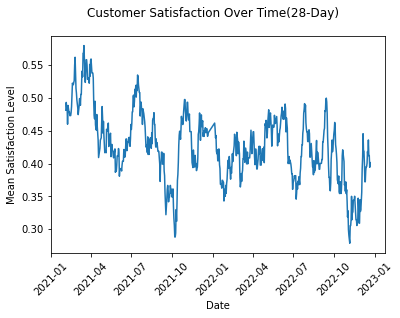

In [2084]:
plt.plot(rm28.index, rm28['satisfied'])
plt.xlabel('Date')
plt.ylabel('Mean Satisfaction Level')
plt.suptitle('Customer Satisfaction Over Time(28-Day)')
plt.xticks(rotation=45)
plt.show()

Try 3 months

In [2085]:
rm3 = df_mean.rolling(90).mean()
# rm3.head()

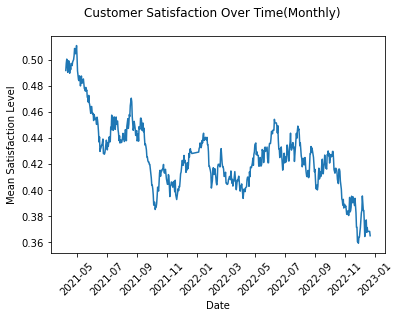

In [2086]:
plt.plot(rm3.index, rm3['satisfied'])
plt.xlabel('Date')
plt.ylabel('Mean Satisfaction Level')
plt.suptitle('Customer Satisfaction Over Time(Monthly)')
plt.xticks(rotation=45)
plt.show()

It still can't really see a trend, so we try to merge data from 1 day to 1 month.

In [2087]:
df_month = new_df.resample('M').mean()
# df_month.head()

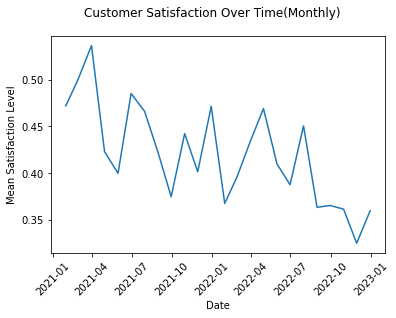

In [2088]:
plt.plot(df_month.index, df_month['satisfied'])
plt.xlabel('Date')
plt.ylabel('Mean Satisfaction Level')
plt.suptitle('Customer Satisfaction Over Time(Monthly)')
plt.xticks(rotation=45)
plt.show()

And 3 months.

In [2089]:
df_3month = new_df.resample('3M').mean()
# df_3month.head()

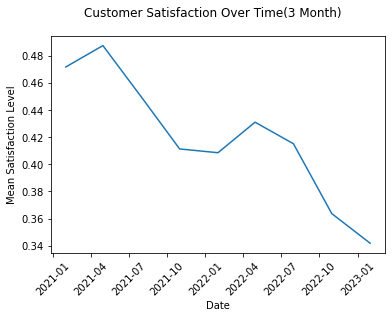

In [2090]:
plt.plot(df_3month.index, df_3month['satisfied'])
plt.xlabel('Date')
plt.ylabel('Mean Satisfaction Level')
plt.suptitle('Customer Satisfaction Over Time(3 Month)')
plt.xticks(rotation=45)

plt.show()

In [2091]:
df_6month = new_df.resample('6M').mean()
# df_6month.head()

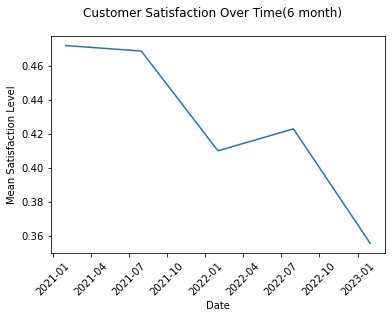

In [2092]:
plt.plot(df_6month.index, df_6month['satisfied'])
plt.xlabel('Date')
plt.ylabel('Mean Satisfaction Level')
plt.suptitle('Customer Satisfaction Over Time(6 month)')
plt.xticks(rotation=45)
plt.show()

In [2093]:
rm6 = df_mean.rolling(182).mean()

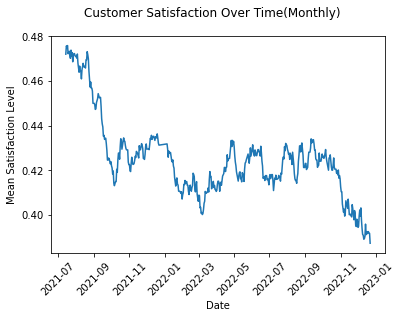

In [2094]:
plt.plot(rm6.index, rm6['satisfied'])
plt.xlabel('Date')
plt.ylabel('Mean Satisfaction Level')
plt.suptitle('Customer Satisfaction Over Time(Monthly)')
plt.xticks(rotation=45)
plt.show()

In [2095]:
rm12 = df_mean.rolling(365).mean()
# rm3.head()

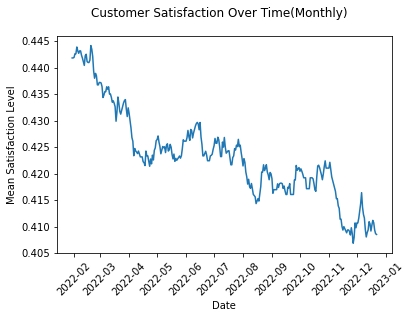

In [2096]:
plt.plot(rm12.index, rm12['satisfied'])
plt.xlabel('Date')
plt.ylabel('Mean Satisfaction Level')
plt.suptitle('Customer Satisfaction Over Time(Monthly)')
plt.xticks(rotation=45)
plt.show()

In [2097]:
rmm6 = df_month.rolling(6).mean()

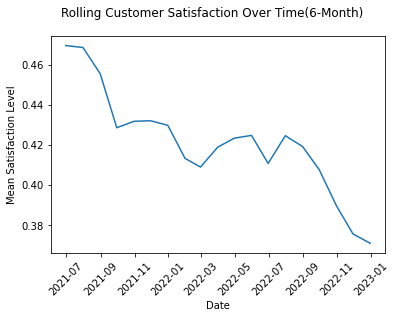

In [2098]:
plt.plot(rmm6.index, rmm6['satisfied'])
plt.xlabel('Date')
plt.ylabel('Mean Satisfaction Level')
plt.suptitle('Rolling Customer Satisfaction Over Time(6-Month)')
plt.xticks(rotation=45)
plt.show()

In [2099]:
rmm12 = df_month.rolling(12).mean()

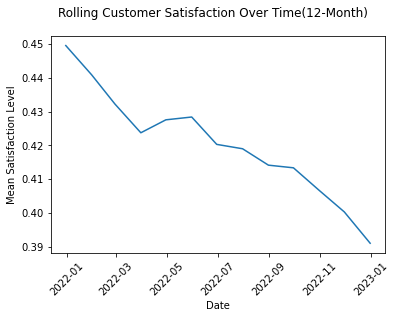

In [2100]:
plt.plot(rmm12.index, rmm12['satisfied'])
plt.xlabel('Date')
plt.ylabel('Mean Satisfaction Level')
plt.suptitle('Rolling Customer Satisfaction Over Time(12-Month)')
plt.xticks(rotation=45)
plt.show()

Now, take a look the score for online banking over time.

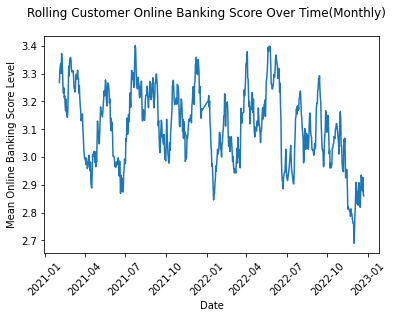

In [2101]:
plt.plot(rm28.index, rm28['online_banking'])
plt.xlabel('Date')
plt.ylabel('Mean Online Banking Score Level')
plt.suptitle('Rolling Customer Online Banking Score Over Time(Monthly)')
plt.xticks(rotation=45)
plt.show()

With this, we can tell that it flutuates a lot and doesn't really have a trend.

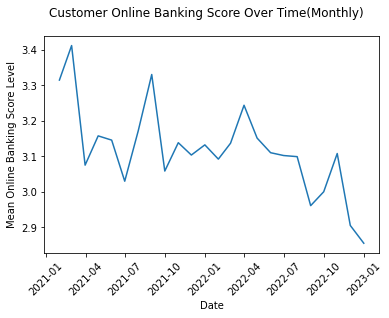

In [2102]:
plt.plot(df_month.index, df_month['online_banking'])
plt.xlabel('Date')
plt.ylabel('Mean Online Banking Score Level')
plt.suptitle('Customer Online Banking Score Over Time(Monthly)')
plt.xticks(rotation=45)
plt.show()

But now, we can tell that actually it falls slightly over time.

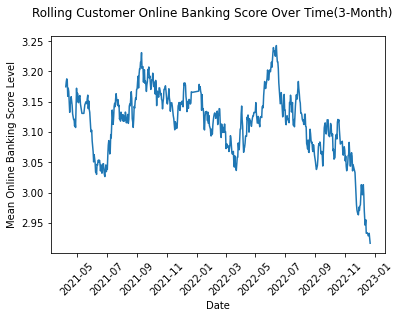

In [2103]:
plt.plot(rm3.index, rm3['online_banking'])
plt.xlabel('Date')
plt.ylabel('Mean Online Banking Score Level')
plt.suptitle('Rolling Customer Online Banking Score Over Time(3-Month)')
plt.xticks(rotation=45)
plt.show()

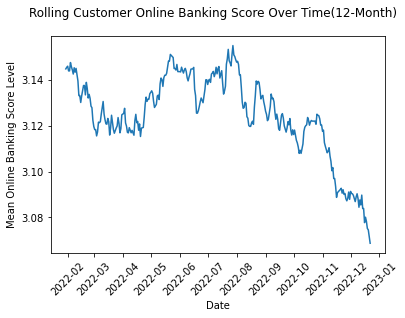

In [2104]:
plt.plot(rm12.index, rm12['online_banking'])
plt.xlabel('Date')
plt.ylabel('Mean Online Banking Score Level')
plt.suptitle('Rolling Customer Online Banking Score Over Time(12-Month)')
plt.xticks(rotation=45)
plt.show()

Convenience score over time.

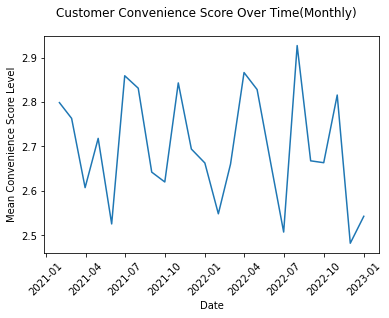

In [2105]:
plt.plot(df_month.index, df_month['convenience'])
plt.xlabel('Date')
plt.ylabel('Mean Convenience Score Level')
plt.suptitle('Customer Convenience Score Over Time(Monthly)')
plt.xticks(rotation=45)
plt.show()

With this, it seems like maybe it has seasonal trend.

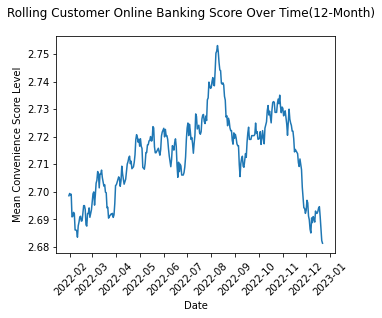

In [2106]:
plt.figure(figsize=(5,4))
plt.plot(rm12.index, rm12['convenience'])
plt.xlabel('Date')
plt.ylabel('Mean Convenience Score Level')
plt.suptitle('Rolling Customer Online Banking Score Over Time(12-Month)')
plt.xticks(rotation=45)
plt.show()


But with 12 month rolling data, we could see that it doesn't really have seasonal trend, but the score peaks in Aug 2022.

Let's see the correlations between variables, and put two varibale into a graph to see the relation.

In [2107]:
# calculate the pairwise correlations
df_c = df.corr()

In [2108]:
from itertools import combinations
rows = []
for v1, v2 in combinations(df_c.columns, 2):
    rows.append({"Variable 1": v1, "Variable 2": v2, "Correlation": df_c[v1][v2]})
pd.DataFrame(rows).sort_values(by="Correlation", ascending=False)

,Variable 1,Variable 2,Correlation
69,online_banking,satisfied,0.460471
46,convenience,customer_service,0.451109
79,fees_charges,reputation,0.393171
85,products_services,privacy_security,0.351859
75,interest_rates,satisfied,0.349509
...,...,...,...
38,has_mortgage,online_banking,-0.161556
40,has_mortgage,fees_charges,-0.163665
13,customer_age,has_cc,-0.192121
39,has_mortgage,interest_rates,-0.241805


Convenience & customer service score over time.

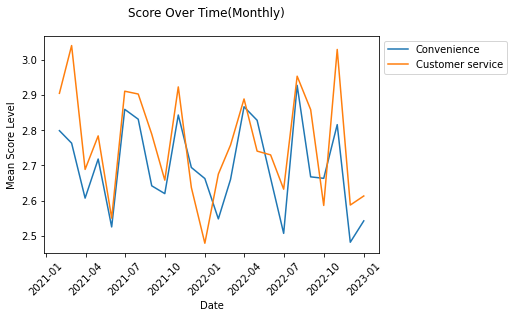

In [2109]:
plt.plot(df_month.index, df_month['convenience'],df_month['customer_service'])
plt.xlabel('Date')
plt.ylabel('Mean Score Level')
plt.suptitle('Score Over Time(Monthly)')
plt.legend(labels = ['Convenience', 'Customer service'] , loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

Their correlation is 0.46 which is the highest, we can see in this line graph and say they do have "similiar" pattern (compared to relation between other variables.)/

Now, we take a look with yearly rolling data, it's interesting that with this, we couldn't really say that they are related a lot! It also tells us that customer service score are always slightly higher than convience score.

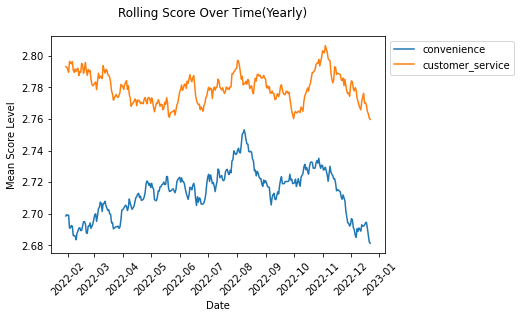

In [2110]:
plt.plot(rm12.index, rm12['convenience'],rm12['customer_service'])
plt.xlabel('Date')
plt.ylabel('Mean Score Level')
plt.suptitle('Rolling Score Over Time(Yearly)')
plt.legend(labels = ['convenience', 'customer_service'] , loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

and this just gives us a simpler.

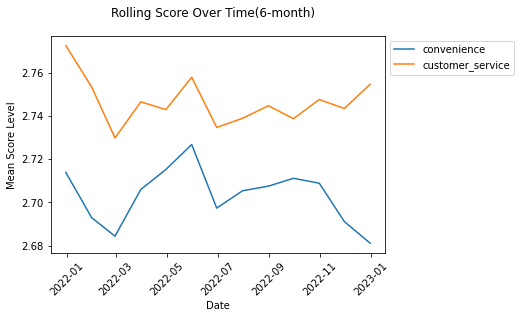

In [2111]:
plt.plot(rmm12.index, rmm12['convenience'],rmm12['customer_service'])
plt.xlabel('Date')
plt.ylabel('Mean Score Level')
plt.suptitle('Rolling Score Over Time(6-month)')
plt.legend(labels = ['convenience', 'customer_service'] , loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

Fee charges & reputation service score over time.

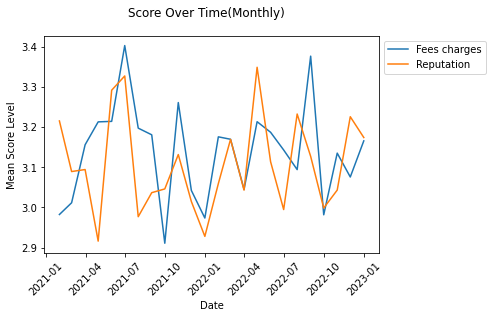

In [2112]:
plt.plot(df_month.index, df_month['fees_charges'],df_month['reputation'])
plt.xlabel('Date')
plt.ylabel('Mean Score Level')
plt.suptitle('Score Over Time(Monthly)')
plt.legend(labels = ['Fees charges', 'Reputation'] , loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

With this monthly graph, we can really see anything from this.

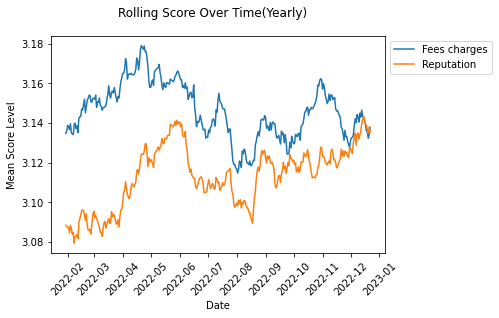

In [2113]:
plt.plot(rm12.index, rm12['fees_charges'],rm12['reputation'])
plt.xlabel('Date')
plt.ylabel('Mean Score Level')
plt.suptitle('Rolling Score Over Time(Yearly)')
plt.legend(labels =['Fees charges', 'Reputation'] , loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

Now, we could tell that fee charges do have some fluctuation over time, but it actually quite steady, compared to reputation, it does climb up over times.

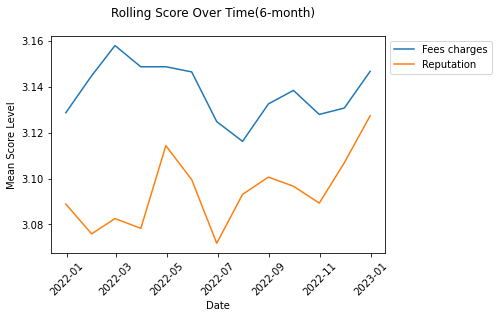

In [2114]:
plt.plot(rmm12.index, rmm12['fees_charges'],rmm12['reputation'])
plt.xlabel('Date')
plt.ylabel('Mean Score Level')
plt.suptitle('Rolling Score Over Time(6-month)')
plt.legend(labels = ['Fees charges', 'Reputation'] , loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

Online-banking & satisfication score over time.

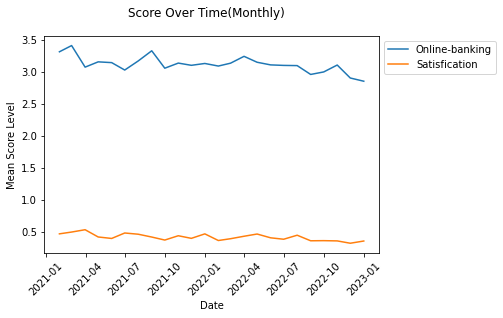

In [2115]:
plt.plot(df_month.index, df_month['online_banking'],df_month['satisfied'])
plt.xlabel('Date')
plt.ylabel('Mean Score Level')
plt.suptitle('Score Over Time(Monthly)')
plt.legend(labels = ['Online-banking', 'Satisfication'] , loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

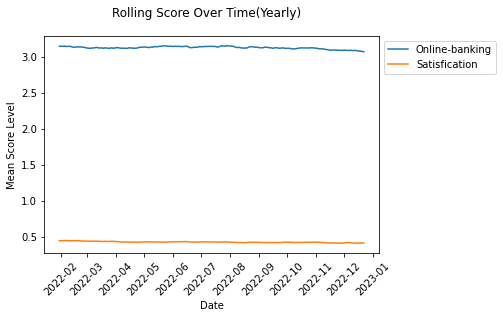

In [2116]:
plt.plot(rm12.index, rm12['online_banking'],rm12['satisfied'])
plt.xlabel('Date')
plt.ylabel('Mean Score Level')
plt.suptitle('Rolling Score Over Time(Yearly)')
plt.legend(labels = ['Online-banking', 'Satisfication'] , loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

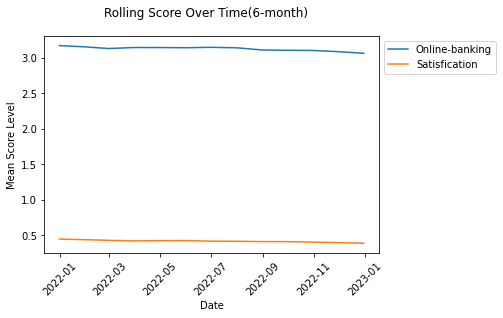

In [2117]:
plt.plot(rmm12.index, rmm12['online_banking'],rmm12['satisfied'])
plt.xlabel('Date')
plt.ylabel('Mean Score Level')
plt.suptitle('Rolling Score Over Time(6-month)')
plt.legend(labels = ['Online-banking', 'Satisfication'] , loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

Has mortgage & satisfication score over time.

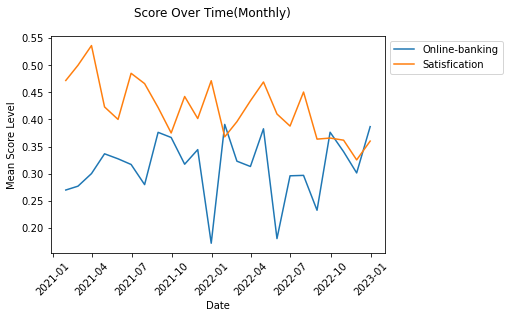

In [2118]:
plt.plot(df_month.index, df_month['has_mortgage'],df_month['satisfied'])
plt.xlabel('Date')
plt.ylabel('Mean Score Level')
plt.suptitle('Score Over Time(Monthly)')
plt.legend(labels = ['Online-banking', 'Satisfication'] , loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

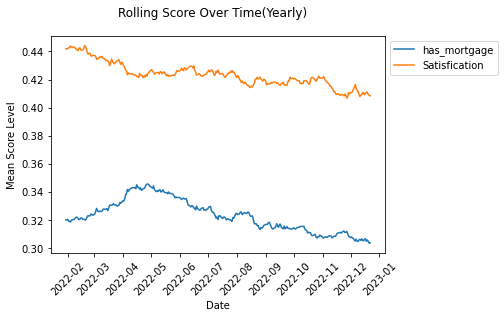

In [2119]:
plt.plot(rm12.index, rm12['has_mortgage'],rm12['satisfied'])
plt.xlabel('Date')
plt.ylabel('Mean Score Level')
plt.suptitle('Rolling Score Over Time(Yearly)')
plt.legend(labels = ['has_mortgage', 'Satisfication'] , loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

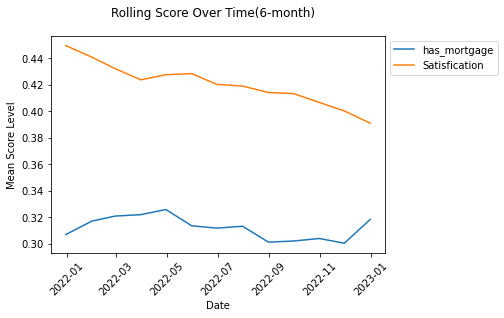

In [2120]:
plt.plot(rmm12.index, rmm12['has_mortgage'],rmm12['satisfied'])
plt.xlabel('Date')
plt.ylabel('Mean Score Level')
plt.suptitle('Rolling Score Over Time(6-month)')
plt.legend(labels = ['has_mortgage', 'Satisfication'] , loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

## task 3

In [2121]:
df["satisfied"].value_counts()

False    1368
True      997
Name: satisfied, dtype: int64

First, we use k-NN as our classifier.

In [2122]:
target = df["satisfied"]
data = df[['convenience', 'customer_service', 'online_banking', 'interest_rates', 'fees_charges', 'community_involvement', 'products_services', 'privacy_security', 'reputation']
].copy()

We use 60% of data for training and 40% for testing

In [2123]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.4, random_state=1)
print("Training set has %d examples" % data_train.shape[0])
print("Test set has %d examples" % data_test.shape[0])

Training set has 1419 examples
Test set has 946 examples


Train the classifier and make predictions for the test set

In [2124]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
m = knn.fit(data_train, target_train)
predicted = knn.predict(data_test)

Evaluate accuracy

In [2125]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(target_test, predicted)
print("Accuracy=%.3f" % acc)

Accuracy=0.765


Evaluate F1 score

In [2126]:
from sklearn.metrics import f1_score
print("True = %.3f" % f1_score(target_test, predicted, pos_label =True) )
print("False = %.3f" % f1_score(target_test, predicted, pos_label=False) )

True = 0.704
False = 0.806


Build the confusion matrix

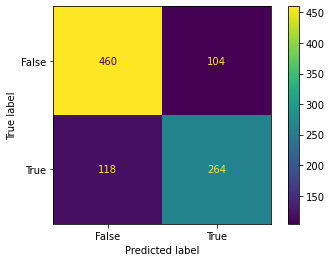

In [2127]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(target_test, predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot();

Cross validation

In [2128]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=1)
fold_scores = cross_val_score(knn, data, target, cv=5, scoring="accuracy")
mean_accuracies = {1: fold_scores.mean()}
print("KNN (k=1): Mean cross-validation accuracy = %.3f" % mean_accuracies[1])

KNN (k=1): Mean cross-validation accuracy = 0.738


In [2129]:
for k in range(2,11):
    # apply KNN for the specified value
    knn = KNeighborsClassifier(n_neighbors=k)
    fold_scores = cross_val_score(knn, data, target, cv=5, scoring="accuracy")
    mean_accuracies[k] = fold_scores.mean()

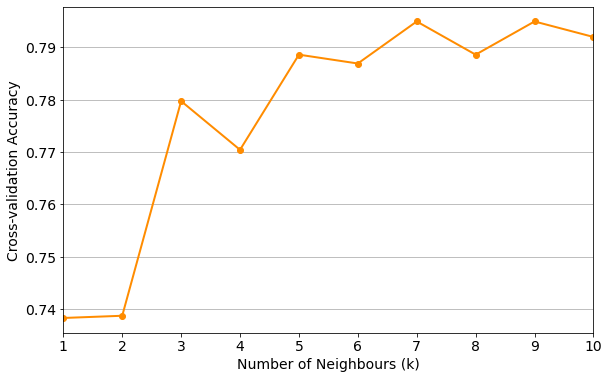

In [2130]:
df_mean_accuracies = pd.Series(mean_accuracies)
ax = df_mean_accuracies.plot(figsize=(9.5,6), fontsize=14, lw=2, marker='o', color="darkorange")
ax.set_ylabel("Cross-validation Accuracy", fontsize=14)
ax.set_xlabel("Number of Neighbours (k)", fontsize=14)
ax.yaxis.grid()
ax.set_xlim(1, 10);

To find the best value of k

In [2131]:
# sort the values to see the parameter giving the highest accuracy
df_sorted = df_mean_accuracies.sort_values(ascending=False)
print(df_sorted)
# get the value of k which gives the highest accuracy
best_k = df_sorted.index[0]
print("Best value is k=%d" % best_k)

7     0.794926
9     0.794926
10    0.791966
5     0.788584
8     0.788584
6     0.786892
3     0.779704
4     0.770402
2     0.738689
1     0.738266
dtype: float64
Best value is k=7


Apply 5-fold cross-validation, measuring accuracy each time

In [2132]:
model = KNeighborsClassifier(n_neighbors=3)
acc_scores = cross_val_score(model, data, target, cv=5, scoring="accuracy")

In [2133]:
labels = ["Fold %d" % i for i in range(1,len(acc_scores)+1)]
s_acc = pd.Series(acc_scores, index = labels)
s_acc

Fold 1    0.758985
Fold 2    0.780127
Fold 3    0.765328
Fold 4    0.799154
Fold 5    0.794926
dtype: float64

In [2134]:
print("Mean accuracy: %.4f" % s_acc.mean())

Mean accuracy: 0.7797


Which is quite nice.

sometimes, the subset would have a higher accuracy, so let's take a look if there's another set that working better than whole set of data.

In [2135]:
subset1 = ['convenience', 'customer_service', 'online_banking']

In [2136]:
# try the first subset of features
data1 = data[subset1]
knn = KNeighborsClassifier(n_neighbors=best_k)
fold_scores = cross_val_score(knn, data1, target, cv=5, scoring="accuracy")
mean_acc1 = fold_scores.mean()
print("Subset 1 - KNN (k=%d): Mean cross-validation accuracy = %.3f" % (best_k, mean_acc1))

Subset 1 - KNN (k=7): Mean cross-validation accuracy = 0.735


In [2137]:
subset2 = ['interest_rates', 'fees_charges']

In [2138]:
# try the second subset of features
data2 = data[subset2]
knn = KNeighborsClassifier(n_neighbors=best_k)
fold_scores = cross_val_score(knn, data2, target, cv=5, scoring="accuracy")
mean_acc2 = fold_scores.mean()
print("Subset 2 - KNN (k=%d): Mean cross-validation accuracy = %.3f" % (best_k, mean_acc2))

Subset 2 - KNN (k=7): Mean cross-validation accuracy = 0.678


In [2139]:
subset3 = ['privacy_security', 'reputation']

In [2140]:
# try the third subset of features
data3 = data[subset3]
knn = KNeighborsClassifier(n_neighbors=best_k)
fold_scores = cross_val_score(knn, data3, target, cv=5, scoring="accuracy")
mean_acc3 = fold_scores.mean()
print("Subset 3 - KNN (k=%d): Mean cross-validation accuracy = %.3f" % (best_k, mean_acc3))

Subset 3 - KNN (k=7): Mean cross-validation accuracy = 0.597


In [2141]:
subset4 = ['community_involvement', 'products_services', 'customer_service']

In [2142]:
# try the third subset of features
data4 = data[subset4]
knn = KNeighborsClassifier(n_neighbors=best_k)
fold_scores = cross_val_score(knn, data4, target, cv=5, scoring="accuracy")
mean_acc4 = fold_scores.mean()
print("Subset 4 - KNN (k=%d): Mean cross-validation accuracy = %.3f" % (best_k, mean_acc4))

Subset 4 - KNN (k=7): Mean cross-validation accuracy = 0.655


When we use the whole data, the accuracy is 0.7780 and higher than these 4 subsets.

### Logistic regression:

In [2143]:
target = df["satisfied"]
data = df[['convenience', 'customer_service', 'online_banking', 'interest_rates', 'fees_charges', 'community_involvement', 'products_services', 'privacy_security', 'reputation']
].copy()

We use 60% of data for training and 40% for testing

In [2144]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.4, random_state=1)
print("Training set has %d examples" % data_train.shape[0])
print("Test set has %d examples" % data_test.shape[0])

Training set has 1419 examples
Test set has 946 examples


Train the classifier and make predictions for the test set

In [2145]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

m = log_reg.fit(data_train, target_train)
predicted = log_reg.predict(data_test)

Evaluate accuracy

In [2146]:
acc = accuracy_score(target_test, predicted)
print("Accuracy=%.4f" % acc)

Accuracy=0.7822


Evaluate F1 score

In [2147]:
print("True = %.3f" % f1_score(target_test, predicted, pos_label =True) )
print("False = %.3f" % f1_score(target_test, predicted, pos_label=False) )

True = 0.725
False = 0.820


Build the confusion matrix

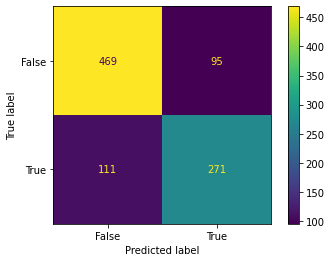

In [2148]:
cm = confusion_matrix(target_test, predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot();

Cross validation

In [2149]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression()
scores = cross_val_score(log_reg, data, target, cv=5, scoring='accuracy')

print('Accuracy scores:',scores)
print('Mean accuracy:', scores.mean())

Accuracy scores: [0.75475687 0.78224101 0.76955603 0.82663848 0.76321353]
Mean accuracy: 0.7792811839323468


In [2150]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Define the hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=1)

# Instantiate the logistic regression model
log_reg = LogisticRegression()

# Perform grid search using cross-validation to tune the hyperparameters
grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Make predictions using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f" % accuracy)

Best hyperparameters: {'C': 1}
Accuracy: 0.782


With 78.2% accuracy, actually it's quite nice.

## Decision tree:

In [2151]:
target = df["satisfied"]
data = df[['convenience', 'customer_service', 'online_banking', 'interest_rates', 'fees_charges', 'community_involvement', 'products_services', 'privacy_security', 'reputation']
].copy()

We use 60% of data for training and 40% for testing

In [2152]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.4, random_state=1)
print("Training set has %d examples" % data_train.shape[0])
print("Test set has %d examples" % data_test.shape[0])

Training set has 1419 examples
Test set has 946 examples


Train the classifier and make predictions for the test set

In [2153]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
m = tree.fit(data_train, target_train)

predicted = tree.predict(data_test)

Evaluate accuracy

In [2154]:
acc = accuracy_score(target_test, predicted)
print("Accuracy=%.3f" % acc)

Accuracy=0.784


Evaluate F1 score

In [2155]:
print("True = %.3f" % f1_score(target_test, predicted, pos_label =True) )
print("False = %.3f" % f1_score(target_test, predicted, pos_label=False) )

True = 0.740
False = 0.816


Build the confusion matrix

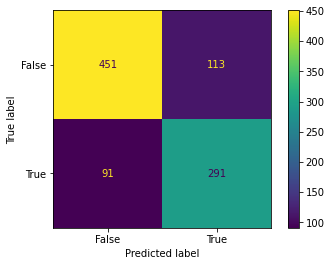

In [2156]:
cm = confusion_matrix(target_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot();

Cross validation

In [2157]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

tree = DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(tree, data, target, cv=5, scoring='accuracy')

print('Accuracy scores:',scores)
print('Mean accuracy:', scores.mean())

Accuracy scores: [0.78858351 0.77589852 0.7653277  0.80549683 0.79915433]
Mean accuracy: 0.7868921775898521


In [2158]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Define the hyperparameters to tune
param_grid = {'max_depth': [2, 4, 6, 8, 10, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=1)

# Instantiate the decision tree model
dtc = DecisionTreeClassifier()

# Perform grid search using cross-validation to tune the hyperparameters
grid_search = GridSearchCV(dtc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Make predictions using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f" % accuracy)


Best hyperparameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.782


This one is even higher, it's really good.

Now, let's see the performance of these three different classifier.

In [2159]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Define the classifiers
knn = KNeighborsClassifier()
log_reg = LogisticRegression()
dtc = DecisionTreeClassifier()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=1)

# Train the classifiers and make predictions on the test data
classifiers = [knn, log_reg, dtc]
clf_names = ['KNN', 'Logistic Regression', 'Decision Tree']
for i, clf in enumerate(classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('\n', clf_names[i], 'classifier')
    
    # Evaluate the performance of the classifier
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    
    # Perform cross-validation to get a more robust estimate of the classifier's performance
    scores = cross_val_score(clf, data, target, cv=5, scoring='accuracy')
    print('Cross-validation scores:', scores)
    print('Mean cross-validation accuracy:', scores.mean())



 KNN classifier
Accuracy: 0.8054968287526427
Precision: 0.809375
Recall: 0.6780104712041884
F1 Score: 0.737891737891738
Confusion Matrix:
 [[503  61]
 [123 259]]
Cross-validation scores: [0.7653277  0.78012685 0.79915433 0.80338266 0.794926  ]
Mean cross-validation accuracy: 0.7885835095137421

 Logistic Regression classifier
Accuracy: 0.7822410147991543
Precision: 0.7404371584699454
Recall: 0.7094240837696335
F1 Score: 0.7245989304812834
Confusion Matrix:
 [[469  95]
 [111 271]]
Cross-validation scores: [0.75475687 0.78224101 0.76955603 0.82663848 0.76321353]
Mean cross-validation accuracy: 0.7792811839323468

 Decision Tree classifier
Accuracy: 0.7536997885835095
Precision: 0.685785536159601
Recall: 0.7198952879581152
F1 Score: 0.7024265644955301
Confusion Matrix:
 [[438 126]
 [107 275]]
Cross-validation scores: [0.74418605 0.73784355 0.73572939 0.74418605 0.76744186]
Mean cross-validation accuracy: 0.7458773784355179


Either the mean before cross validation or not, the acuuracy is always around 0.74 to 0.78. So i could say that these three are quite similiar when analyzing the data. They both give high accuracy.

## task 4

In [2160]:
# Reset index to integer and keep the date column as a regular column
df.reset_index(inplace=True)

# Print the dataframe to verify the changes
df.head()

,date,customer_id,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
0,2021-01-05,334485,Male,46.000000,Munster,Personal,True,True,3.0,2.768771,3.0,2.0,1.000000,2.0,3.0,3.000000,3.104492,False
1,2021-01-05,208587,Male,30.000000,Leinster,Business,True,True,2.0,2.000000,4.0,3.0,3.138395,5.0,4.0,5.000000,4.000000,False
2,2021-01-05,11724,Female,47.495486,Munster,Business-Plus,True,True,3.0,1.000000,3.0,3.0,5.000000,1.0,5.0,5.000000,4.000000,False
3,2021-01-05,163058,Female,33.000000,Leinster,Business,True,False,2.0,2.000000,1.0,3.0,1.000000,5.0,5.0,3.396296,2.000000,False
4,2021-01-06,305619,Male,47.495486,Leinster,Business,True,False,5.0,4.000000,2.0,1.0,2.000000,4.0,3.0,4.000000,4.000000,True


In [2161]:
df1 = pd.read_csv("bank-comments.csv", sep="\t")
df1.tail()

,customer_id,date,comments
2995,322582,2021-09-23,No comment
2996,53418,2021-03-07,Online banking is really good
2997,79364,2021-08-01,customer service quality from this bank is ter...
2998,371134,2021-06-25,Great to see that my bank supports local sport...
2999,109281,2022-10-04,The bank ' a online platform is really impress...


In [2162]:
df2 = pd.merge(df, df1, on='customer_id')
df2

,date_x,customer_id,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied,date_y,comments
0,2021-01-05,334485,Male,46.000000,Munster,Personal,True,True,3.0,2.768771,3.0,2.0,1.000000,2.0,3.0,3.000000,3.104492,False,2021-01-05,No comment
1,2021-01-05,208587,Male,30.000000,Leinster,Business,True,True,2.0,2.000000,4.0,3.0,3.138395,5.0,4.0,5.000000,4.000000,False,2021-01-05,no
2,2021-01-05,11724,Female,47.495486,Munster,Business-Plus,True,True,3.0,1.000000,3.0,3.0,5.000000,1.0,5.0,5.000000,4.000000,False,2021-01-05,NaN
3,2021-01-05,163058,Female,33.000000,Leinster,Business,True,False,2.0,2.000000,1.0,3.0,1.000000,5.0,5.0,3.396296,2.000000,False,2021-01-05,NaN
4,2021-01-06,305619,Male,47.495486,Leinster,Business,True,False,5.0,4.000000,2.0,1.0,2.000000,4.0,3.0,4.000000,4.000000,True,2021-01-06,Bank branches are really easy to find. My comm...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360,2022-12-22,159839,Male,56.000000,Leinster,Business,True,False,4.0,4.000000,4.0,4.0,5.000000,5.0,5.0,5.000000,4.000000,True,2022-12-22,(no comment)
2361,2022-12-22,139994,Unspecified,30.000000,Leinster,Personal,True,False,1.0,1.000000,1.0,2.0,4.000000,5.0,4.0,3.396296,3.104492,False,2022-12-22,The Bank is not doing enough to support local ...
2362,2022-12-22,310725,Female,21.000000,Leinster,Personal,True,True,3.0,3.000000,3.0,1.0,3.000000,1.0,3.0,3.396296,3.000000,False,2022-12-22,Bank savings rates are very low. Not good enou...
2363,2022-12-22,177476,Female,32.000000,Leinster,Personal,True,True,1.0,1.000000,1.0,1.0,2.000000,3.0,2.0,4.000000,2.000000,False,2022-12-22,Your fees are too much. I had such a bad exper...


In [2163]:
df2.isna().sum()

date_x                     0
customer_id                0
customer_gender            0
customer_age               0
customer_location          0
customer_type              0
has_cc                     0
has_mortgage               0
convenience                0
customer_service           0
online_banking             0
interest_rates             0
fees_charges               0
community_involvement      0
products_services          0
privacy_security           0
reputation                 0
satisfied                  0
date_y                     0
comments                 408
dtype: int64

In [2164]:
df2.dropna(inplace=True)

In [2165]:
df2.isna().sum()

date_x                   0
customer_id              0
customer_gender          0
customer_age             0
customer_location        0
customer_type            0
has_cc                   0
has_mortgage             0
convenience              0
customer_service         0
online_banking           0
interest_rates           0
fees_charges             0
community_involvement    0
products_services        0
privacy_security         0
reputation               0
satisfied                0
date_y                   0
comments                 0
dtype: int64

In [2166]:
target = df2["satisfied"]
target.value_counts()

False    1128
True      829
Name: satisfied, dtype: int64

In [2167]:
documents = df2["comments"]

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 3, stop_words=None)
X = vectorizer.fit_transform(documents)

# check the size of the resulting representation
print(X.shape)


(1957, 603)


In [2168]:
# check the number of terms/words in our preprocessed vocabulary
terms = vectorizer.get_feature_names_out()
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 603 distinct terms


### k-nn

In [2169]:
# perform the split - note test_size=0.3 means 30% assigned to the test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42)
# data_train, data_test, target_train, target_test = train_test_split(X, target, test_size=0.3)
# we will just check how many comments in each set
print("Training set has %d comments" % X_train.shape[0] )
print("Test set has %d comments" % X_test.shape[0] )

Training set has 1369 comments
Test set has 588 comments


In [2170]:
# prepare the k-NN classification model, for 3 nearest neighbours in this case
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [2171]:
# make predictions for the tweets in the test set
y_pred = model.predict(X_test)
y_pred

array([False,  True, False, False,  True, False, False,  True, False,
       False, False,  True, False, False,  True, False,  True, False,
       False,  True, False, False,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False,  True,  True, False, False, False,  True, False,
       False,  True, False, False,  True,  True, False, False,  True,
       False,  True,  True, False, False, False,  True, False, False,
        True, False,  True, False, False,  True,  True,  True, False,
       False, False, False, False,  True,  True,  True, False,  True,
       False,  True,  True, False,  True, False, False, False,  True,
       False,  True, False, False,  True, False, False,  True, False,
       False,  True, False,  True,  True, False,  True,  True, False,
       False, False,

Evaluate the performance of the classifier

In [2172]:
from sklearn.metrics import accuracy_score
print("Accuracy = %.3f" % accuracy_score(y_test, y_pred))

Accuracy = 0.898


Evaluate F1 score

In [2173]:
print("True = %.3f" % f1_score(y_test, y_pred, pos_label =True) )
print("False = %.3f" % f1_score(y_test, y_pred, pos_label=False) )

True = 0.875
False = 0.914


Build the confusion matrix

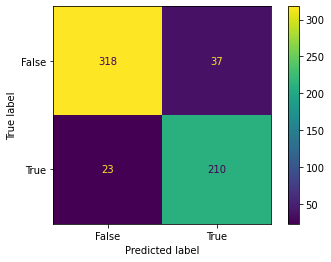

In [2174]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot();

Cross validation

In [2175]:
# represent the results as a Pandas Series
acc_scores = cross_val_score(model, X, target, cv=5, scoring="accuracy")
labels = ["Fold %d" % i for i in range(1,len(acc_scores)+1)]
s_acc = pd.Series(acc_scores, index = labels)
s_acc

Fold 1    0.908163
Fold 2    0.903061
Fold 3    0.879795
Fold 4    0.907928
Fold 5    0.913043
dtype: float64

In [2176]:
# overall average accuracy
print("Mean accuracy: %.4f" % s_acc.mean())

Mean accuracy: 0.9024


### Logistic Regression

In [2177]:
documents = df2['comments']
target = df2['satisfied']

Convert the text data to numerical data using bag-of-words and split the data into training and testing sets


In [2178]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_data)
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42)

Train the logistic regression model and make predictions on the testing dataa

In [2179]:
# vectorizer.fit(labels)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

Evaluate the performance of the classifier

In [2180]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy(logistic regression):", accuracy)

Accuracy(logistic regression): 0.9404761904761905


Evaluate F1 score

In [2181]:
print("True = %.3f" % f1_score(y_test, y_pred, pos_label =True) )
print("False = %.3f" % f1_score(y_test, y_pred, pos_label=False) )

True = 0.920
False = 0.953


Build the confusion matrix

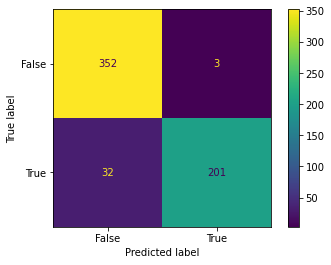

In [2182]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot();

Cross validation

In [2183]:
scores = cross_val_score(logreg, X, target, cv=5, scoring='accuracy')
print('Cross-validation accuracy scores:',scores)
print('Mean accuracy:', scores.mean())

Cross-validation accuracy scores: [0.95663265 0.93622449 0.93861893 0.91304348 0.93606138]
Mean accuracy: 0.9361161856046767


### Decision Tree

In [2184]:
documents = df2['comments']
target = df2['satisfied']

We use 60% of data for training and 40% for testing

In [2185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42)
print("Training set has %d examples" % X_train.shape[0])
print("Test set has %d examples" % X_test.shape[0])

Training set has 1369 examples
Test set has 588 examples


Train the decision tree classifier and make predictions on the testing data

In [2186]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

Evaluate the performance of the model using accuracy

In [2187]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy(Decision Tree):", accuracy)

Accuracy(Decision Tree): 0.8962585034013606


Evaluate F1 score

In [2188]:
print("True = %.3f" % f1_score(y_test, y_pred, pos_label =True) )
print("False = %.3f" % f1_score(y_test, y_pred, pos_label=False) )

True = 0.860
False = 0.918


Build the confusion matrix

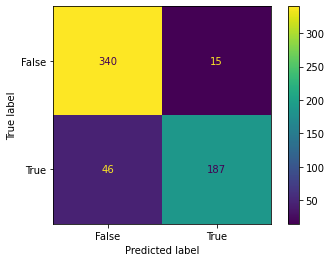

In [2189]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot();

Cross validation

In [2190]:
# Train the decision tree classifier using cross-validation
dtc = DecisionTreeClassifier()
scores = cross_val_score(dtc, X, target, cv=5, scoring='accuracy')

# Print the accuracy scores for each fold and the mean accuracy
print('Accuracy scores:', scores)
print('Mean accuracy:', scores.mean())

Accuracy scores: [0.91326531 0.90816327 0.90025575 0.91048593 0.93861893]
Mean accuracy: 0.9141578370478627


We use three different classifier here, the accuracy for k-nn, logistic regression and decision are  0.906(mean:0.902), 0.94(mean:0.936) and 0.895(mean:0.911) respectively. We could tell that all work quite well on prediction, especially with logistic regression, having 93.6% accuracy in average to predict the satisfication.

## Conclusion

With the classifier accuracy outcomes from task 3 and 4 which are around 80% and 90% respectively, though both are having high accuracy, we stil can easily tell that when people giving feedback with text are more precise than giving numeric one. This quite makes sense, since numbers are just number and in this case, we only scale from 1 to 5, but customers can write anything in the comments. Thogh there are million words in the world, when people talking about experince, there must be some specific words that represent good or bad. That's why using text data to predict if the customers are satisfied has higher accuracy than using tabular data.

The first challenge that I encountered was cleaning the data, at first, I wanted to delete all the data that has empty value in it, but it'll make the database become 3 times smaller, and I think this is not good to do analysis from small amount of data. Then, it's what relations between two variables I would like to know. Finding and learning different classifier is the most challenging part I would say, but seeing the outcomes do lead to something makes me feel happy about it.

I would like to analyze the how living area/age/having mortage these demographic features affect the customer to scale the score in ther future, since I think there must be something related between them. It will be interesting. Also, the trend overtime, with different rolling standard, the graph looks so differnet, and that's all informative.